In [1]:
import pandas as pd
import numpy as np
from ipywidgets import interact
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from tqdm import tqdm

In [2]:
transactions = pd.read_csv("data/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/transaction_data.csv")

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [4]:
def make_pairs(data):
    prods = data["PRODUCT_ID"].unique()
    pa = []
    pb = []
    for i in range(len(prods)):
        for j in range(len(prods)):
            if i != j:
                pa.append(prods[i])
                pb.append(prods[j])
    d = pd.DataFrame()
    d["Pairs 1"] = pd.Series(pa, dtype="int32")
    d["Pairs 2"] = pd.Series(pb, dtype="int32")
    return d

In [5]:
tqdm.pandas("applying")

/home/radeusgd/Anaconda3/envs/ada/lib/python3.7/site-packages/tqdm/std.py:651: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


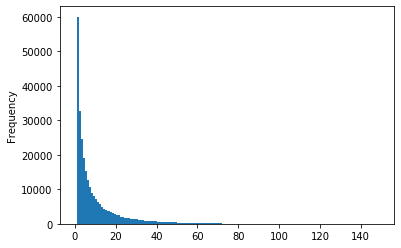

In [6]:
pairs = transactions.groupby("BASKET_ID").apply(len).plot.hist(bins=range(0,150))

In [7]:
pairs = transactions.groupby("BASKET_ID").progress_apply(make_pairs)

100%|██████████| 276484/276484 [09:34<00:00, 481.48it/s]


In [11]:
len(pairs) / 1e6


63.492886

In [12]:
pairs.head()

Pairs 1  Pairs 2
BASKET_ID                      
26984851472 0  1004906  1033142
            1  1004906  1036325
            2  1004906  1082185
            3  1004906  8160430
            4  1033142  1004906

In [13]:
pairs_old = pairs

In [14]:
pairs = pairs_old.reset_index(drop=True)

In [15]:
pairs.head()

,Pairs 1,Pairs 2
0,1004906,1033142
1,1004906,1036325
2,1004906,1082185
3,1004906,8160430
4,1033142,1004906


In [16]:
pairs.to_csv("product_pairs.csv", index=False)

In [19]:
sample = pairs.head(100000)

In [23]:
def f(a):
    print(a)
    raise

In [29]:
counts = pairs.groupby(["Pairs 1", "Pairs 2"]).apply(len)

In [31]:
recurring_counts = counts[counts > 1]

In [32]:
len(recurring_counts)

8198146

In [33]:
recurring_counts.to_csv("product_pairs_counts.csv", index=False)

/home/radeusgd/Anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


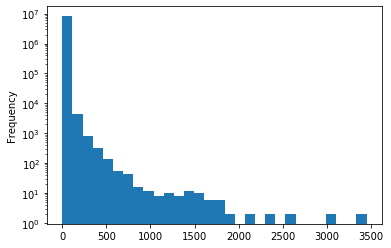

In [68]:
recurring_counts.plot.hist(log=True, bins=30)

In [37]:
sorted_counts = recurring_counts.sort_values(ascending=False)

In [38]:
sorted_counts

Pairs 1  Pairs 2
1029743  1082185    3447
1082185  1029743    3447
995242   1082185    2991
1082185  995242     2991
         981760     2539
                    ... 
1043751  5564901       2
         5565664       2
         5566469       2
         5566697       2
26540    121504        2
Length: 8198146, dtype: int64

In [41]:
top = sorted_counts[sorted_counts > 1000]

In [42]:
top

Pairs 1  Pairs 2
1029743  1082185    3447
1082185  1029743    3447
995242   1082185    2991
1082185  995242     2991
         981760     2539
                    ... 
         903325     1062
1004906  1082185    1036
1082185  1004906    1036
         962568     1024
962568   1082185    1024
Length: 74, dtype: int64

In [43]:
products = pd.read_csv("data/dunnhumby_The-Complete-Journey/dunnhumby - The Complete Journey CSV/product.csv")

In [52]:
topf = top.to_frame(name="Count").reset_index()

In [53]:
topf

,Pairs 1,Pairs 2,Count
0,1029743,1082185,3447
1,1082185,1029743,3447
2,995242,1082185,2991
3,1082185,995242,2991
4,1082185,981760,2539
...,...,...,...
69,1082185,903325,1062
70,1004906,1082185,1036
71,1082185,1004906,1036
72,1082185,962568,1024


In [54]:
m1 = topf.merge(products, left_on="Pairs 1", right_on="PRODUCT_ID")

In [56]:
m2 = m1.merge(products, left_on="Pairs 2", right_on="PRODUCT_ID")

In [57]:
m2

,Pairs 1,Pairs 2,Count,PRODUCT_ID_x,MANUFACTURER_x,DEPARTMENT_x,BRAND_x,COMMODITY_DESC_x,SUB_COMMODITY_DESC_x,CURR_SIZE_OF_PRODUCT_x,PRODUCT_ID_y,MANUFACTURER_y,DEPARTMENT_y,BRAND_y,COMMODITY_DESC_y,SUB_COMMODITY_DESC_y,CURR_SIZE_OF_PRODUCT_y
0,1029743,1082185,3447,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
1,995242,1082185,2991,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
2,981760,1082185,2539,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
3,1127831,1082185,2350,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,1106523,1082185,2110,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1082185,1024306,1160,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,1024306,2,PRODUCE,National,MELONS,CANTALOUPE WHOLE,
70,1082185,901062,1100,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,901062,2,PRODUCE,National,APPLES,APPLES GALA (BULK&BAG),
71,1082185,903325,1062,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,903325,2,PRODUCE,National,BROCCOLI/CAULIFLOWER,BROCCOLI WHOLE&CROWNS,
72,1082185,1004906,1036,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB,1004906,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB


In [87]:
interesting_counts = recurring_counts[recurring_counts > 100].to_frame(name="Count").reset_index()

In [88]:
interesting_counts

,Pairs 1,Pairs 2,Count
0,819594,1082185,106
1,819765,1082185,141
2,819840,1082185,168
3,819927,1082185,179
4,819978,933835,137
...,...,...,...
7885,13115903,13115548,105
7886,13841744,1082185,112
7887,13842090,13842214,105
7888,13842214,13842090,105


In [89]:
sales = transactions.groupby("PRODUCT_ID").apply(len)

In [90]:
counts_sales = interesting_counts.merge(sales.rename("Sales 1").to_frame(), left_on="Pairs 1", right_on="PRODUCT_ID")

In [91]:
counts_sales["Relative Count"] = 100.0 * counts_sales["Count"] / counts_sales["Sales 1"]

In [92]:
counts_sales.sort_values("Relative Count", ascending=False)

,Pairs 1,Pairs 2,Count,Sales 1,Relative Count
4113,1021164,5978648,299,330,90.606061
6797,1108429,1005186,135,196,68.877551
1542,892728,1082185,142,210,67.619048
4990,1055737,1082185,158,262,60.305344
7688,6632283,1082185,152,254,59.842520
...,...,...,...,...,...
6180,1082185,1123792,101,29778,0.339177
5491,1082185,857390,101,29778,0.339177
6297,1082185,8014645,101,29778,0.339177
6329,1082185,9677366,101,29778,0.339177


In [93]:
significant_pairs = counts_sales[counts_sales["Relative Count"] > 50] 

In [99]:
merged = significant_pairs.merge(products, left_on="Pairs 1", right_on="PRODUCT_ID").merge(products, left_on="Pairs 2", right_on="PRODUCT_ID").sort_values("Relative Count", ascending=False)

In [100]:
merged

,Pairs 1,Pairs 2,Count,Sales 1,Relative Count,PRODUCT_ID_x,MANUFACTURER_x,DEPARTMENT_x,BRAND_x,COMMODITY_DESC_x,SUB_COMMODITY_DESC_x,CURR_SIZE_OF_PRODUCT_x,PRODUCT_ID_y,MANUFACTURER_y,DEPARTMENT_y,BRAND_y,COMMODITY_DESC_y,SUB_COMMODITY_DESC_y,CURR_SIZE_OF_PRODUCT_y
39,1021164,5978648,299,330,90.606061,1021164,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,ELECTRONIC GIFT CARDS ACTIVATI,,5978648,1,,National,,,
43,1108429,1005186,135,196,68.877551,1108429,2202,SALAD BAR,National,SALAD BAR,CONDIMENTS/SUPPLIES,1.5OZ,1005186,2,SALAD BAR,National,SALAD BAR,SALAD BAR FRESH FRUIT,
8,892728,1082185,142,210,67.619048,892728,1733,GROCERY,National,BAKED SWEET GOODS,SNACK CAKE - MULTI PACK,8.75 OZ,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
20,1055737,1082185,158,262,60.305344,1055737,170,GROCERY,National,FRUIT - SHELF STABLE,FRUIT BOWL AND CUPS,6/3.9 OZ,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
29,6632283,1082185,152,254,59.842520,6632283,103,GROCERY,National,SOFT DRINKS,SOFT DRINKS 6PK/4PK CAN CARB (,12 OZ,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
34,833935,923967,118,200,59.000000,833935,1046,GROCERY,National,CANNED JUICES,ASEPTIC PACK JUICE AND DRINKS,6.75 OZ,923967,1046,GROCERY,National,CANNED JUICES,ASEPTIC PACK JUICE AND DRINKS,6.75 OZ
28,5586942,1082185,219,380,57.631579,5586942,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
44,1126203,894236,168,292,57.534247,1126203,5888,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,,894236,866,DRUG GM,National,NEWSPAPER,NEWSPAPER,
48,8011285,8011397,129,226,57.079646,8011285,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,8011397,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ
46,8011285,8011282,129,226,57.079646,8011285,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,8011282,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ


In [137]:
bigger_counts = recurring_counts[recurring_counts > 500].to_frame(name="Count").reset_index()

In [138]:
bigger_counts

,Pairs 1,Pairs 2,Count
0,820165,1082185,796
1,826249,883404,689
2,826249,995242,567
3,826249,1029743,753
4,826249,1082185,1286
...,...,...,...
281,5978648,1082185,798
282,5978656,1082185,1312
283,6034857,1082185,795
284,8090521,8090537,719


In [139]:
import networkx as nx

In [140]:
graph = nx.from_pandas_edgelist(bigger_counts, 'Pairs 1', 'Pairs 2', edge_attr=None, create_using= nx.Graph())

In [141]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 92
Number of edges: 143
Average degree:   3.1087


In [142]:
cliques = list(nx.clique.find_cliques(graph))

(array([58., 26.,  8.,  3.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 10 Patch objects>)

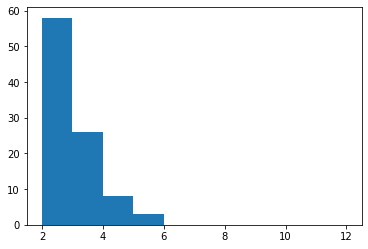

In [143]:
plt.hist(list(map(len, cliques)), bins=range(2,13))

In [156]:
big_cliques = list(filter(lambda c: len(c) > 3, cliques))

In [157]:
products.index = products["PRODUCT_ID"]

In [158]:
names = (products["COMMODITY_DESC"] + " - " + products["SUB_COMMODITY_DESC"]).to_dict()

In [159]:
def assign_name(pid):
    return names[pid]

In [160]:
big_cliques = list(map(lambda c: list(map(assign_name, c)), big_cliques))

In [161]:
big_cliques

[['TROPICAL FRUIT - BANANAS',
  'TOMATOES - TOMATOES HOTHOUSE ON THE VINE',
  'VEGETABLES - ALL OTHERS - CUCUMBERS',
  'VEGETABLES SALAD - HEAD LETTUCE'],
 ['TROPICAL FRUIT - BANANAS',
  'FLUID MILK PRODUCTS - FLUID MILK WHITE ONLY',
  'EGGS - EGGS - X-LARGE',
  'BAKED BREAD/BUNS/ROLLS - MAINSTREAM WHITE BREAD'],
 ['TROPICAL FRUIT - BANANAS',
  'FLUID MILK PRODUCTS - FLUID MILK WHITE ONLY',
  'EGGS - EGGS - X-LARGE',
  'BAKED BREAD/BUNS/ROLLS - MAINSTREAM WHITE BREAD'],
 ['TROPICAL FRUIT - BANANAS',
  'FLUID MILK PRODUCTS - FLUID MILK WHITE ONLY',
  'EGGS - EGGS - X-LARGE',
  'PEPPERS-ALL - PEPPERS GREEN BELL'],
 ['TROPICAL FRUIT - BANANAS',
  'FLUID MILK PRODUCTS - FLUID MILK WHITE ONLY',
  'EGGS - EGGS - X-LARGE',
  'BAKED BREAD/BUNS/ROLLS - MAINSTREAM WHITE BREAD'],
 ['TROPICAL FRUIT - BANANAS',
  'FLUID MILK PRODUCTS - FLUID MILK WHITE ONLY',
  'EGGS - EGGS - X-LARGE',
  'BAKED BREAD/BUNS/ROLLS - MAINSTREAM WHITE BREAD'],
 ['TROPICAL FRUIT - BANANAS',
  'FLUID MILK PRODUCTS - FLUID

In [162]:
graph = nx.from_pandas_edgelist(counts_sales[counts_sales["Relative Count"] > 30], 'Pairs 1', 'Pairs 2', edge_attr=None, create_using= nx.Graph())

In [163]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 673
Number of edges: 830
Average degree:   2.4666


In [164]:
cliques = list(nx.clique.find_cliques(graph))

(array([529.,  30.,  18.,  15.,  12.,   1.,   0.,   0.,   0.,   0.]),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 10 Patch objects>)

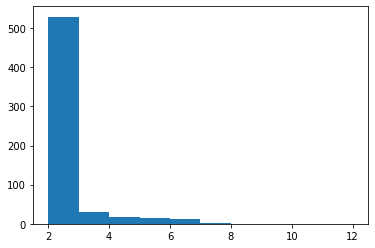

In [165]:
plt.hist(list(map(len, cliques)), bins=range(2,13))

In [172]:
big_cliques = list(filter(lambda c: len(c) > 4, cliques))

In [173]:
products.index = products["PRODUCT_ID"]

In [174]:
names = (products["COMMODITY_DESC"] + " - " + products["SUB_COMMODITY_DESC"]).to_dict()

In [175]:
def assign_name(pid):
    return names[pid]

In [176]:
big_cliques = list(map(lambda c: list(map(assign_name, c)), big_cliques))

In [178]:
big_cliques[:3]

[['PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES'],
 ['PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES'],
 ['PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES',
  'PWDR/CRYSTL DRNK MX - SOFT DRINK POWDER POUCHES']]

In [ ]:
# TODO these are different products because they have different quantities - we might want to merge products by name and redo the analysis